In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
file_name = "/content/newsCorpora.csv"
# コーパスを列ラベル付きにしてDataFrame形式で保存
df = pd.read_csv(file_name, sep='\t', header=None, names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])
print(df)

            ID                                              TITLE  \
0            1  Fed official says weak data caused by weather,...   
1            2  Fed's Charles Plosser sees high bar for change...   
2            3  US open: Stocks fall after Fed official hints ...   
3            4  Fed risks falling 'behind the curve', Charles ...   
4            5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
...        ...                                                ...   
422414  422933  Surgeons to remove 4-year-old's rib to rebuild...   
422415  422934  Boy to have surgery on esophagus after battery...   
422416  422935  Child who swallowed battery to have reconstruc...   
422417  422936  Phoenix boy undergoes surgery to repair throat...   
422418  422937  Phoenix boy undergoes surgery to repair throat...   

                                                      URL          PUBLISHER  \
0       http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1       htt

In [ ]:
# "PUBLISHER"列が"Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"のみを抽出
df = df[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])]
print(df)

            ID                                              TITLE  \
12          13       Europe reaches crunch point on banking union   
13          14  ECB FOCUS-Stronger euro drowns out ECB's messa...   
19          20  Euro Anxieties Wane as Bunds Top Treasuries, S...   
20          21  Noyer Says Strong Euro Creates Unwarranted Eco...   
29          30  REFILE-Bad loan triggers key feature in ECB ba...   
...        ...                                                ...   
422300  422819     UN: Ebola Could Eventually Infect 20000 People   
422301  422820  Ebola toll tops 1550, continues to accelerate ...   
422302  422821  UPDATE 1-Ebola toll tops 1550, outbreak accele...   
422309  422828  Ebola Cases May Surpass 20000, WHO Says in Upd...   
422319  422838  Air France suspends flights to Ebola-hit Sierr...   

                                                      URL        PUBLISHER  \
12      http://in.reuters.com/article/2014/03/10/eu-ba...          Reuters   
13      http://

In [ ]:
train,val_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['CATEGORY'])
valid, test = train_test_split(val_test, test_size=0.5, random_state=42, shuffle=True, stratify=val_test['CATEGORY'])

In [ ]:
train[["CATEGORY", "TITLE"]].to_csv('/content/train.txt', sep='\t', index=False)
valid[["CATEGORY", "TITLE"]].to_csv('/content/valid.txt', sep='\t', index=False)
test[["CATEGORY", "TITLE"]].to_csv('/content/test.txt', sep='\t', index=False)

In [ ]:
print("-----train-----")
print(train["CATEGORY"].value_counts())
print("-----valid-----")
print(valid["CATEGORY"].value_counts())
print("-----test-----")
print(test["CATEGORY"].value_counts())

-----train-----
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
-----valid-----
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
-----test-----
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
import string
import re

In [ ]:
def preprocessing_text(text):
    for p in string.punctuation:
        text = text.replace(p, " ") 
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    return text

In [ ]:
train['TITLE'] = train['TITLE'].map(preprocessing_text)
valid['TITLE'] = valid['TITLE'].map(preprocessing_text)
test['TITLE'] = test['TITLE'].map(preprocessing_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
train_count = vectorizer.fit_transform(train['TITLE'])
valid_count = vectorizer.transform(valid['TITLE'])
test_count = vectorizer.transform(test['TITLE'])

In [ ]:
train_count = pd.DataFrame(train_count.toarray(), columns=vectorizer.get_feature_names_out())
valid_count = pd.DataFrame(valid_count.toarray(), columns=vectorizer.get_feature_names_out())
test_count = pd.DataFrame(test_count.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
train_count.to_csv('/content/train.feature.txt', sep='\t', index=False)
valid_count.to_csv('/content/valid.feature.txt', sep='\t', index=False)
test_count.to_csv('/content/test.feature.txt', sep='\t', index=False)

In [ ]:
train_count.loc[0][train_count.loc[0]>0]

and           1
birthday      1
celebrates    1
daughter      1
day           1
father        1
first         1
kanye         2
west          2
Name: 0, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
train_tfidf = vectorizer.fit_transform(train['TITLE'])
valid_tfidf = vectorizer.transform(valid['TITLE'])
test_tfidf = vectorizer.transform(test['TITLE'])

In [ ]:
vectorizer

TfidfVectorizer()

In [ ]:
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
valid_tfidf = pd.DataFrame(valid_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf = pd.DataFrame(test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
train_tfidf.to_csv('/content/train.feature.txt', sep='\t', index=False)
valid_tfidf.to_csv('/content/valid.feature.txt', sep='\t', index=False)
test_tfidf.to_csv('/content/test.feature.txt', sep='\t', index=False)

In [ ]:
# ラベル（カテゴリ）抽出
train_y = pd.read_csv('/content/train.txt', sep='\t')
valid_y = pd.read_csv('/content/valid.txt', sep='\t')
test_y = pd.read_csv('/content/test.txt', sep='\t')

In [ ]:
train_y = train_y["CATEGORY"]
valid_y = valid_y["CATEGORY"]
test_y = test_y["CATEGORY"]

In [ ]:
# モデル学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(train_count, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
model.predict(valid_count)
valid_pred = model.predict(valid_count)

In [ ]:
model.predict_proba(valid_count)

array([[8.70612284e-01, 9.87278687e-02, 1.54306105e-02, 1.52292370e-02],
       [9.99631850e-01, 1.01567478e-04, 2.05738478e-04, 6.08445012e-05],
       [6.34040085e-01, 2.01827051e-01, 1.70884938e-02, 1.47044370e-01],
       ...,
       [4.66536648e-03, 9.87930893e-01, 3.73858224e-03, 3.66515783e-03],
       [9.99842275e-01, 7.31571908e-05, 2.09929788e-05, 6.35748723e-05],
       [9.98349467e-01, 2.62434652e-04, 2.51219200e-04, 1.13687906e-03]])

In [ ]:
import numpy as np
def score(model, texts):
    probs = model.predict_proba(texts).max(axis=1)
    preds = model.predict(texts)
    return np.stack([probs, preds],axis=1)

In [ ]:
score(model, valid_count)

array([[0.8706122838606791, 'b'],
       [0.9996318495425321, 'b'],
       [0.6340400850054422, 'b'],
       ...,
       [0.9879308934523595, 'e'],
       [0.9998422749581002, 'b'],
       [0.998349467090969, 'b']], dtype=object)

In [137]:
from sklearn.metrics import accuracy_score

pred_y_train = model.predict(train_count)
pred_y_test = model.predict(test_count)
pred_y_valid = model.predict(valid_count)
print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
print(f"valid_accuracy：{accuracy_score(valid_y, pred_y_valid)}")
print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")

train_accuracy：0.9994377811094453
valid_accuracy：0.9032983508245878
test_accuracy：0.9130434782608695


In [138]:
from sklearn.metrics import accuracy_score
 
pred_y_train = model.predict(train_tfidf)
pred_y_valid = model.predict(valid_tfidf)
pred_y_test = model.predict(test_tfidf)
print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
print(f"valid_accuracy：{accuracy_score(valid_y, pred_y_valid)}")
print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")

train_accuracy：0.9571776611694153
valid_accuracy：0.8650674662668666
test_accuracy：0.8845577211394303


In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_y_train = model.predict(train_count)
pred_y_test = model.predict(test_count)
pred_y_valid = model.predict(valid_count)

In [141]:
cm = confusion_matrix(train_y, pred_y_train)

In [142]:
print(cm)

[[4500    1    0    1]
 [   0 4223    0    0]
 [   0    1  727    0]
 [   3    0    0 1216]]


In [143]:
cm = confusion_matrix(test_y, pred_y_test)

In [144]:
print(cm)

[[529  12   2  20]
 [  9 509   3   7]
 [ 12   9  67   3]
 [ 23  10   6 113]]


In [145]:
from sklearn.metrics import precision_score

In [146]:
print(precision_score(train_y, pred_y_train,average = None))

[0.99933378 0.99952663 1.         0.99917831]


In [148]:
print(precision_score(valid_y, pred_y_valid,average = None))

[0.90800681 0.92764378 0.80232558 0.8442623 ]


In [147]:
print(precision_score(test_y, pred_y_test,average = None))

[0.92321117 0.94259259 0.85897436 0.79020979]


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print(recall_score(train_y, pred_y_train,average = None))

[0.99689027 0.99810561 0.99587912 0.98605414]


In [149]:
print(recall_score(valid_y, pred_y_valid,average = None))

[0.94839858 0.9469697  0.75824176 0.67320261]


In [ ]:
print(recall_score(test_y, pred_y_test,average = None))

[0.96269982 0.98295455 0.72527473 0.71710526]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(train_y, pred_y_train,average = None))

[0.99611586 0.99810561 0.99656357 0.98848684]


In [151]:
print(f1_score(valid_y, pred_y_valid,average = None))

[0.92776327 0.93720712 0.77966102 0.74909091]


In [ ]:
print(f1_score(test_y, pred_y_test,average = None))

[0.9426087  0.95756458 0.825      0.79562044]


In [ ]:
features = train_count.columns.values
index = [i for i in range(1, 11)]
for category, coef in zip(model.classes_, model.coef_):
  print(category)
  print(features[np.argsort(coef)[::-1][:10]])
  print(features[np.argsort(coef)[:10]])


b
['bank' 'fed' 'ecb' 'obamacare' 'china' 'ukraine' 'oil' 'dollar' 'buy'
 'yellen']
['activision' 'aereo' 'ebola' 'twitch' 'subscription' 'cap' 'she'
 'heartbleed' 'nintendo' 'her']
e
['chris' 'kardashian' 'thrones' 'paul' 'transformers' 'movie' 'cyrus'
 'miley' 'george' 'kim']
['google' 'billion' 'gm' 'facebook' 'china' 'ceo' 'study' 'ebola' 'data'
 'risk']
m
['ebola' 'cancer' 'fda' 'mers' 'study' 'cases' 'drug' 'doctors'
 'cigarettes' 'cdc']
['gm' 'facebook' 'climate' 'twitter' 'apple' 'netflix' 'amazon' 'cyrus'
 'miley' 'buy']
t
['facebook' 'google' 'apple' 'climate' 'microsoft' 'heartbleed'
 'activision' 'nasa' 'tesla' 'fcc']
['percent' 'stocks' 'grows' 'expands' 'valued' 'american' 'thrones'
 'should' 'drug' 'home']


In [152]:
c_score =[]
c_num = 0.001
for i in range(0,7):
  model = LogisticRegression(random_state=42,C = c_num)
  model.fit(train_count, train_y)
  model.predict(valid_count)
  model.predict_proba(valid_count)
  def score(model, texts):
      probs = model.predict_proba(texts).max(axis=1)
      preds = model.predict(texts)
      return np.stack([probs, preds],axis=1)
  score(model, valid_count)
  pred_y_train = model.predict(train_count)
  pred_y_valid = model.predict(valid_count)
  pred_y_test = model.predict(test_count)
  print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
  print(f"valid_accuracy：{accuracy_score(valid_y, pred_y_valid)}")
  print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")
  c_score.append([c_num,accuracy_score(train_y, pred_y_train),accuracy_score(valid_y, pred_y_valid),accuracy_score(test_y, pred_y_test)])
  c_num *= 10

train_accuracy：0.7240442278860569
valid_accuracy：0.7038980509745127
test_accuracy：0.7106446776611695
train_accuracy：0.7857008995502249
valid_accuracy：0.7728635682158921
test_accuracy：0.767616191904048
train_accuracy：0.9265367316341829
valid_accuracy：0.8710644677661169
test_accuracy：0.8793103448275862


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy：0.9960644677661169
valid_accuracy：0.9077961019490255
test_accuracy：0.9265367316341829


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy：0.9993440779610195
valid_accuracy：0.9100449775112444
test_accuracy：0.9272863568215892


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy：0.9994377811094453
valid_accuracy：0.9062968515742129
test_accuracy：0.9235382308845578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy：0.9994377811094453
valid_accuracy：0.9032983508245878
test_accuracy：0.9130434782608695


In [159]:
import math

c_x = []
c_y = []
c_z = []
c_a = []
for i in range(len(c_score)):
  c_x.append(c_score[i][0])
  c_y.append(c_score[i][1])
  c_z.append(c_score[i][2])
  c_a.append(c_score[i][3])



In [154]:
import matplotlib.pyplot as plt

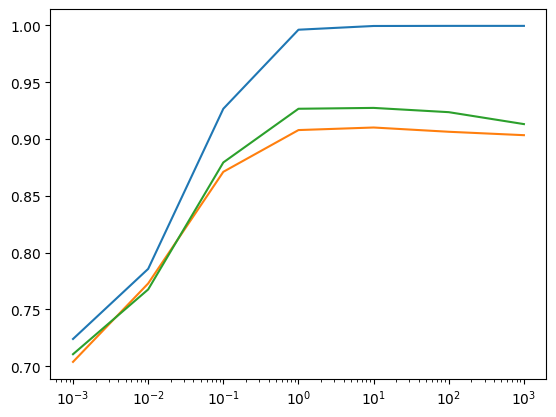

In [160]:
plt.plot(c_x,c_y)
plt.xscale('log')
plt.plot(c_x,c_z)
plt.xscale('log')
plt.plot(c_x,c_a)
plt.xscale('log')

In [118]:
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
LR_random = {LogisticRegression(): {"C": scipy.stats.uniform(0.00001, 1000),"random_state": scipy.stats.randint(0, 100)}}

for model, param in LR_random.items():
    clf =RandomizedSearchCV(model, param)
    clf.fit(train_count, train_y)
    pred_y = clf.predict(test_y)
    score = f1_score(test_y, pred_y, average="micro")

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: ignored